In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import gym
from main.maml_agent import MAMLAgent, register_flags
register_flags()
from main.alpaca import *
from main.dataset import *
from main.dataViz import *
import yaml

WARN: Cannot define MaxPoolGrad, likely already defined for this version of tensorflow: "Registering two gradient with name 'MaxPoolGrad' !(Previous registration was in <module> /home/apoorva/.envs/adapt/lib/python3.5/site-packages/ipykernel_launcher.py:16)"


In [2]:
cfg_filename = 'configs/sinusoid-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.load(ymlfile)

In [3]:
dataset = SinusoidDataset(config)

## Default agent

In [4]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g1)
agent = ALPaCA(config, sess1, g1)

In [5]:
agent.construct_model()

In [6]:
agent.train(dataset,3000)

loss: 241.9892
loss: 15.436197
loss: 7.5940056
loss: 14.758332
loss: 5.0395885
loss: 9.50873
loss: 0.48885077
loss: 0.47974876
loss: -0.20350486
loss: -0.10115132
loss: 0.2811883
loss: 1.8709332
loss: 1.5740671
loss: 1.2762623
loss: -0.30974215
loss: -0.22961454
loss: -1.377424
loss: 0.103286676
loss: -0.16299698
loss: 0.31246632
loss: -0.9167482
loss: -0.855691
loss: -1.2649878
loss: -0.017313085
loss: -0.41303018
loss: 2.1925569
loss: -0.87510496
loss: -0.9427973
loss: 0.81545717
loss: -1.0541873
loss: -0.5648216
loss: -1.2368225
loss: -1.0633748
loss: -0.7217993
loss: -1.2554767
loss: -0.52626145
loss: -1.3076538
loss: -1.6755111
loss: -1.494677
loss: -1.637358
loss: -0.7228726
loss: -0.6776143
loss: -1.3396415
loss: -1.569397
loss: -1.0306334
loss: -1.0119913
loss: -1.2561595
loss: -1.7043054
loss: -1.096748
loss: -0.7447957
loss: -0.16518588
loss: -1.6342572
loss: 0.030222453
loss: 0.4112279
loss: -0.16719253
loss: -1.5303607
loss: 0.21982025
loss: -0.9684256
loss: -0.6475805
loss

## Agent without meta-training

In [7]:
g2 = tf.Graph()
sess2 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g2)
agent_nometa = ALPaCA(config,sess2,g2)
agent_nometa.config['data_horizon'] = 0
agent_nometa.construct_model()
agent_nometa.train(dataset, 3000)

loss: 6.139398
loss: 2.678311
loss: 2.2968109
loss: 2.8919177
loss: 2.273782
loss: 2.3948796
loss: 2.4742327
loss: 1.7560012
loss: 2.3197064
loss: 2.0995452
loss: 2.2619474
loss: 1.9336424
loss: 2.0107071
loss: 2.1265676
loss: 2.4807239
loss: 1.9713359
loss: 2.1310227
loss: 2.2619686
loss: 1.6624556
loss: 1.8060977
loss: 2.0975325
loss: 2.2705514
loss: 2.2972343
loss: 1.9269915
loss: 1.6732816
loss: 1.7299583
loss: 1.688349
loss: 1.9096744
loss: 2.0164547
loss: 2.4994974
loss: 2.1508393
loss: 1.9438803
loss: 2.4258087
loss: 2.663762
loss: 2.6739635
loss: 1.8430976
loss: 2.6445398
loss: 1.5464362
loss: 1.9323834
loss: 1.907772
loss: 2.1317697
loss: 2.6394813
loss: 2.4503956
loss: 2.1080906
loss: 1.8458694
loss: 1.9620732
loss: 1.8687537
loss: 2.171971
loss: 1.8555832
loss: 1.7154349
loss: 2.1394684
loss: 1.9584051
loss: 2.298382
loss: 1.6518707
loss: 2.1801565
loss: 1.9776441
loss: 2.1195953
loss: 2.0976813
loss: 1.8905759
loss: 2.0279658


## GP regression agent

In [8]:
from main.gp_reg import *

GPR_agent = GPReg()

## MAML Agent

In [21]:
g3 = tf.Graph()
sess3 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g3)
maml_agent = MAMLAgent(config, sess3, g3, exp_string="sinusoid_test5")

In [22]:
maml_agent.construct_model()

using sinusoid arch
INFO:tensorflow:Summary name metatrain_Pre-update loss is illegal; using metatrain_Pre-update_loss instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 1 is illegal; using metatrain_Post-update_loss__step_1 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 2 is illegal; using metatrain_Post-update_loss__step_2 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 3 is illegal; using metatrain_Post-update_loss__step_3 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 4 is illegal; using metatrain_Post-update_loss__step_4 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 5 is illegal; using metatrain_Post-update_loss__step_5 instead.


In [25]:
maml_agent.train(dataset, 10000)

Done initializing, starting training.
Iteration 1000: 2.5094688, 1.9421264
Iteration 2000: 3.1832607, 1.2411926
Iteration 3000: 2.9974039, 0.90191233
Iteration 4000: 3.0644865, 0.75444955
Iteration 5000: 2.885614, 0.62246996
Iteration 6000: 3.0853467, 0.6670337
Iteration 7000: 3.125768, 0.5954168
Iteration 8000: 3.197142, 0.6863507
Iteration 9000: 3.0413918, 0.6390026


# Visualize all agents

In [31]:
N_test = 500
test_horz = 30
X_test, Y_test, freq_list_test, amp_list_test, phase_list_test = dataset.sample(N_test,test_horz, return_lists=True)

/home/apoorva/.envs/adapt/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'funcalls': 0, 'grad': array([0., 0., 0.]), 'nit': 0, 'task': b'ERROR: NO FEASIBLE SOLUTION', 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


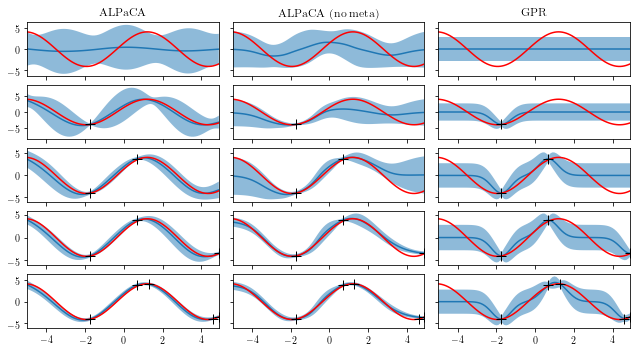

In [13]:
ind = 10
sample_size_list = [0,1,2,3,5]
plt.figure(figsize=(9,len(sample_size_list)*1))
for i,num_pts in enumerate(sample_size_list):
    X_update = X_test[ind:(ind+1),:num_pts,:]
    Y_update = Y_test[ind:(ind+1),:num_pts,:]
    
    title=None
    legend=False
    if i == 0:
        legend=True
        title=True
        
    ax1 = plt.subplot(len(sample_size_list),3,3*i+1)
    gen_sin_fig(agent, X_update, Y_update, freq_list_test[ind], phase_list_test[ind], amp_list_test[ind], label=None)
    if i == 0:
        plt.title('ALPaCA')
    if i < len(sample_size_list) - 1:
        plt.setp(ax1.get_xticklabels(), visible=False)
    
    ax2 = plt.subplot(len(sample_size_list),3,3*i+2, sharey=ax1)
    gen_sin_fig(agent_nometa, X_update, Y_update, freq_list_test[ind], phase_list_test[ind], amp_list_test[ind], label=None)
    plt.setp(ax2.get_yticklabels(), visible=False)
    if i == 0:
        plt.title('ALPaCA (no meta)')
    if i < len(sample_size_list) - 1:
        plt.setp(ax2.get_xticklabels(), visible=False)
    
    ax3 = plt.subplot(len(sample_size_list),3,3*i+3, sharey=ax1)
    gen_sin_fig(GPR_agent, X_update, Y_update, freq_list_test[ind], phase_list_test[ind], amp_list_test[ind], label=None)
    plt.setp(ax3.get_yticklabels(), visible=False)
    if i == 0:
        plt.title('GPR')
    if i < len(sample_size_list) - 1:
        plt.setp(ax3.get_xticklabels(), visible=False)

plt.tight_layout(w_pad=0.0,h_pad=0.2)
plt.savefig('figures/sinusoid_three.pdf')
plt.show()

In [34]:
#compute MSE and time
import time
import tqdm

def gaussian_nll(y,mu,Sig):
    n = 1
    logdet = np.log(Sig) 
    nll = n*np.log(2*np.pi) + logdet + ((y-mu).T * (1/Sig) * (y-mu))
    return 0.5*nll

def MSE(y,mu):
    return (y-mu)**2

def get_stats(meas, N):
    mean = sum(meas)/N
    var = sum([(nl - mean)**2 for nl in meas])/(N-1)
    return mean, var

alpaca_nll_mean = []
alpaca_nll_var = []
alpaca_time_mean = []
alpaca_time_var = []
alpaca_mse_mean = []
alpaca_mse_var = []

maml_time_mean = []
maml_time_var = []
maml_mse_mean = []
maml_mse_var = []
maml5_mse_mean = []
maml5_mse_var = []

lpaca_nll_mean = []
lpaca_nll_var = []
lpaca_time_mean = []
lpaca_time_var = []

gp_nll_mean = []
gp_nll_var = []
gp_time_mean = []
gp_time_var = []

for j in tqdm.tqdm(range(test_horz)):
    nll_list_alpaca = []
    nll_list_lpaca = []
    nll_list_gp = []
    
    mse_list_alpaca = []
    mse_list_maml = []
    mse_list_maml5 = []

    time_list_alpaca = []
    time_list_maml = []
    time_list_lpaca = []
    time_list_gp = []
    
    for ind in range(N_test):
        X_update = X_test[ind:(ind+1),:j,:]
        Y_update = Y_test[ind:(ind+1),:j,:]
        x_pt = X_test[ind:(ind+1),(j):(j+1),:]
        y_pt = Y_test[ind:(ind+1),(j):(j+1),:]
    
        t1_alpaca = time.process_time()
        y, s = agent.test(X_update, Y_update, x_pt)
        t2_alpaca = time.process_time()
        
        t1_maml = time.process_time()
        y_maml, _ = maml_agent.test(X_update, Y_update, x_pt)
        t2_maml = time.process_time()
        y_maml5, _ = maml_agent.test(X_update, Y_update, x_pt, num_updates=5)
        
        t1_lpaca = time.process_time()
        y_lpaca,s_lpaca = agent_nometa.test(X_update, Y_update, x_pt)
        t2_lpaca = time.process_time()
        
        t1_gp = time.process_time()
        y_gp, s_gp = GPR_agent.test(X_update, Y_update, x_pt)
        t2_gp = time.process_time()    
            
        nll_list_alpaca.append(gaussian_nll(y_pt[0,0,0],y[0,0,0],s[0,0,0,0]))
        nll_list_lpaca.append(gaussian_nll(y_pt[0,0,0],y_lpaca[0,0,0],s_lpaca[0,0,0,0]))
        nll_list_gp.append(gaussian_nll(y_pt[0,0,0],y_gp[0,0,0],s_gp[0,0,0,0]))
        
        time_list_alpaca.append(t2_alpaca - t1_alpaca)
        time_list_lpaca.append(t2_lpaca - t1_lpaca)
        time_list_maml.append(t2_maml - t1_maml)
        time_list_gp.append(t2_gp - t1_gp)
        
        mse_list_alpaca.append(MSE(y_pt[0,0,0],y[0,0,0]))
        mse_list_maml.append(MSE(y_pt[0,0,0], y_maml[0,0,0]))
        mse_list_maml5.append(MSE(y_pt[0,0,0], y_maml5[0,0,0]))
        
    time_mean_alpaca, time_var_alpaca = get_stats(time_list_alpaca,N_test)
    time_mean_lpaca, time_var_lpaca = get_stats(time_list_lpaca,N_test)
    time_mean_maml, time_var_maml = get_stats(time_list_maml,N_test)
    time_mean_gp, time_var_gp = get_stats(time_list_gp,N_test)
    
    mse_mean_alpaca, mse_var_alpaca = get_stats(mse_list_alpaca,N_test)
    mse_mean_maml, mse_var_maml = get_stats(mse_list_maml,N_test)
    mse_mean_maml5, mse_var_maml5 = get_stats(mse_list_maml5,N_test)
    
    nll_mean_alpaca, nll_var_alpaca = get_stats(nll_list_alpaca,N_test)
    nll_mean_lpaca, nll_var_lpaca = get_stats(nll_list_lpaca,N_test)
    nll_mean_gp, nll_var_gp = get_stats(nll_list_gp,N_test)
    
    alpaca_time_mean.append(time_mean_alpaca)
    alpaca_time_var.append(time_var_alpaca)
    
    lpaca_time_mean.append(time_mean_lpaca)
    lpaca_time_var.append(time_var_lpaca)
    
    maml_time_mean.append(time_mean_maml)
    maml_time_var.append(time_var_maml)
    
    gp_time_mean.append(time_mean_gp)
    gp_time_var.append(time_var_gp)
    
    alpaca_mse_mean.append(mse_mean_alpaca)
    alpaca_mse_var.append(mse_var_alpaca)
    
    maml_mse_mean.append(mse_mean_maml)
    maml_mse_var.append(mse_var_maml)
    
    maml5_mse_mean.append(mse_mean_maml5)
    maml5_mse_var.append(mse_var_maml5)
    
    alpaca_nll_mean.append(nll_mean_alpaca)
    alpaca_nll_var.append(nll_var_alpaca)
    
    lpaca_nll_mean.append(nll_mean_lpaca)
    lpaca_nll_var.append(nll_var_lpaca)
    
    gp_nll_mean.append(nll_mean_gp)
    gp_nll_var.append(nll_var_gp)

  3%|▎         | 1/30 [00:02<01:05,  2.27s/it]/home/apoorva/.envs/adapt/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'funcalls': 0, 'grad': array([0., 0., 0.]), 'nit': 0, 'task': b'ERROR: NO FEASIBLE SOLUTION', 'warnflag': 2}
  " state: %s" % convergence_dict)
100%|██████████| 30/30 [02:46<00:00,  5.56s/it]


/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


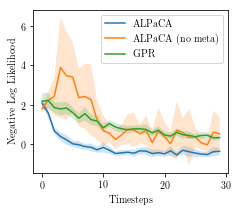

In [28]:
plt.figure(figsize=(3.5,3))
nll_plot(alpaca_nll_mean,alpaca_nll_var,lpaca_nll_mean,lpaca_nll_var,gp_nll_mean,gp_nll_var,N_test,legend=True)
plt.savefig('figures/nll_sinusoid.pdf')
plt.show()

/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


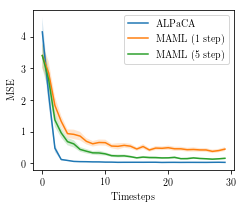

In [35]:
plt.figure(figsize=(3.5,3))
mse_plot(alpaca_mse_mean,alpaca_mse_var,maml_mse_mean,maml_mse_var,maml5_mse_mean,maml5_mse_var,N_test,legend=True)
plt.tight_layout()
plt.savefig('figures/mse_sinusoid.pdf')
plt.show()

/home/apoorva/.envs/adapt/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


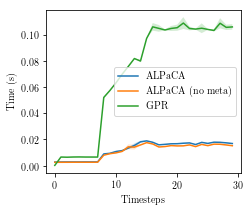

In [36]:
plt.figure(figsize=(3.5,3))
time_plot(alpaca_time_mean,alpaca_time_var,lpaca_time_mean,lpaca_time_var,gp_time_mean,gp_time_var,N_test,legend=True)
plt.savefig('figures/time_sinusoid.pdf')
plt.show()